# Align fibers

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.linalg import orthogonal_procrustes
import ipywidgets as widgets
from IPython.display import display

In [5]:
df = pd.read_csv('combined_actin_compression_metrics_all_velocities_and_repeats_subsampled_with_metrics.csv')
print(df.head())

   Unnamed: 0.1  Unnamed: 0  monomer_ids  time  velocity  repeat simulator  \
0             0           0            0   0.0       4.7       0   cytosim   
1             1           1            1   0.0       4.7       0   cytosim   
2             2           2            2   0.0       4.7       0   cytosim   
3             3           3            3   0.0       4.7       0   cytosim   
4             4           4            4   0.0       4.7       0   cytosim   

       xpos  ypos  zpos  NON_COPLANARITY  PEAK_ASYMMETRY  TOTAL_FIBER_TWIST  \
0 -0.250000   0.0   0.0              0.0             0.0                0.0   
1 -0.247487   0.0   0.0              0.0             0.0                0.0   
2 -0.244975   0.0   0.0              0.0             0.0                0.0   
3 -0.242462   0.0   0.0              0.0             0.0                0.0   
4 -0.239950   0.0   0.0              0.0             0.0                0.0   

   CALC_BENDING_ENERGY  CONTOUR_LENGTH  COMPRESSION_RATI

In [6]:
# Group the DataFrame by 'repeat' and 'time'
grouped = df.groupby(['repeat', 'time'])

# Create a nested dictionary where each key is a tuple (repeat, time)
# and the value is another dictionary with {monomer_id: (xpos, ypos, zpos)}
fibers_dict = {}
for name, group in grouped:
    # Using monomer_ids as keys and tuples of positions as values
    fiber_dict = {row['monomer_ids']: (row['xpos'], row['ypos'], row['zpos']) for index, row in group.iterrows()}
    fibers_dict[name] = fiber_dict

In [11]:
# print the first few groups
list(fibers_dict.keys())[0:10]

[(0, 0.0),
 (0, 5e-06),
 (0, 1e-05),
 (0, 1.5e-05),
 (0, 2e-05),
 (0, 2.5e-05),
 (0, 3e-05),
 (0, 3.5e-05),
 (0, 4e-05),
 (0, 4.5e-05)]

In [33]:
def plot_fibers(fiber_dicts):
    """
    Plots multiple 3D scatter plots of monomers in fibers, each fiber in a different color.
    
    Args:
    fiber_dicts (list of dict): List of dictionaries, each with monomer_ids as keys and (xpos, ypos, zpos) tuples as values.
    """
    # Create a new figure
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # Colors for different fibers, cycles if more fibers than colors
    colors = plt.cm.get_cmap('viridis', len(fiber_dicts))
    
    # Loop through each fiber dictionary and plot
    for idx, fiber_dict in enumerate(fiber_dicts):
        xpos = [pos[0] for pos in fiber_dict.values()]
        ypos = [pos[1] for pos in fiber_dict.values()]
        zpos = [pos[2] for pos in fiber_dict.values()]
        
        # Scatter plot for each fiber
        ax.plot(xpos, ypos, zpos, color=colors(idx), label=f'Fiber {idx + 1}')
    
    # Labeling axes
    ax.set_xlabel('X Position')
    ax.set_ylabel('Y Position')
    ax.set_zlabel('Z Position')
    
    # Title
    ax.set_title('3D Plot of Multiple Fibers')
    
    # Legend
    # ax.legend()

    # Show plot
    plt.show()

In [28]:
fiber_ids = list(fibers_dict.keys())[20:30]
fiber_ids
# fibers_dict[(0, 0.0)]

[(0, 0.0001),
 (0, 0.000105),
 (0, 0.00011),
 (0, 0.000115),
 (0, 0.00012),
 (0, 0.000125),
 (0, 0.00013),
 (0, 0.000135),
 (0, 0.00014),
 (0, 0.000145)]

/var/folders/vy/vr0_ytms6m95qrnk7xnh0bth0000gq/T/ipykernel_78843/3437312976.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('viridis', len(fiber_dicts))


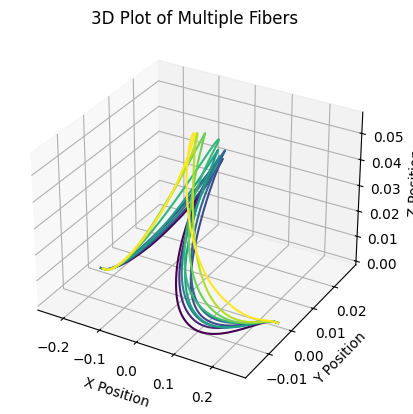

In [34]:
plot_fibers([fibers_dict[fiber_id] for fiber_id in fiber_ids])

In [51]:
def plot_fibers_interactive(fiber_dicts):
    """
    Creates an interactive plot widget for visualizing multiple fibers in 3D.
    
    Args:
    fiber_dicts (list of dict): List of dictionaries, each with monomer_ids as keys and (xpos, ypos, zpos) tuples as values.
    """
    # Set up the figure and axis
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Colors for different fibers, cycles if more fibers than colors
    colors = plt.cm.viridis(np.linspace(0, 1, len(fiber_dicts)))

    # Plot each fiber
    for idx, fiber_dict in enumerate(fiber_dicts):
        xpos = [pos[0] for pos in fiber_dict.values()]
        ypos = [pos[1] for pos in fiber_dict.values()]
        zpos = [pos[2] for pos in fiber_dict.values()]
        ax.plot(xpos, ypos, zpos, color=colors[idx], label=f'Fiber {idx + 1}')

    ax.set_xlabel('X Position')
    ax.set_ylabel('Y Position')
    ax.set_zlabel('Z Position')
    # ax.legend()

    # Function to update the view
    def update_view(angle, elevation):
        ax.view_init(elev=elevation, azim=angle)
        display(fig)

    # Create interactive widgets
    angle_slider = widgets.IntSlider(min=0, max=360, step=1, value=0, description='Rotation angle')
    elevation_slider = widgets.IntSlider(min=-90, max=90, step=1, value=30, description='Elevation angle')
    interact = widgets.interactive(update_view, angle=angle_slider, elevation=elevation_slider)

    display(interact)

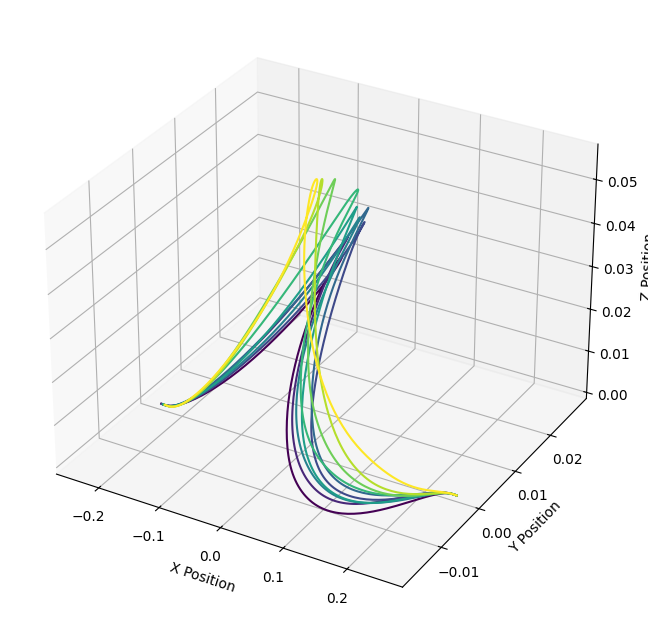

interactive(children=(IntSlider(value=0, description='Rotation angle', max=360), IntSlider(value=30, descripti…

In [52]:
plot_fibers_interactive([fibers_dict[fiber_id] for fiber_id in fiber_ids])

In [57]:
def align_fibers(fiber_dicts):
    """
    Aligns multiple fibers using the orthogonal Procrustes problem.
    
    Args:
    fiber_dicts (list of dict): List of dictionaries with monomer_ids as keys and (xpos, ypos, zpos) tuples as values.

    Returns:
    list of np.ndarray: List of aligned fibers as numpy arrays.
    """
    # Convert dictionaries to list of numpy arrays
    fiber_arrays = [np.array(list(fiber.values())) for fiber in fiber_dicts]
    
    # Use the first fiber as the reference
    reference = fiber_arrays[0]
    
    # Aligned fibers list starting with the reference
    aligned_fibers = [reference]
    
    # Align each fiber to the reference
    for fiber in fiber_arrays[1:]:
        # Calculate the orthogonal matrix that best aligns the fiber to the reference
        R, scale = orthogonal_procrustes(fiber, reference)
        # Align the fiber and add to the list
        aligned_fibers.append(fiber @ R)

    return aligned_fibers

In [61]:
# fibers_dict[(0, 0.0001)]

In [58]:
aligned_fibers = align_fibers([fibers_dict[fiber_id] for fiber_id in fiber_ids])

AttributeError: 'list' object has no attribute 'values'

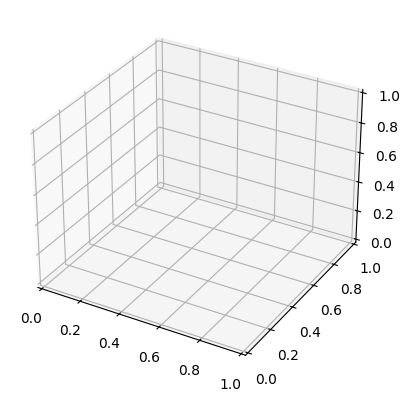

In [62]:
plot_fibers_interactive(aligned_fibers)